In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6
import datetime
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pylab as pl

from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)


Using TensorFlow backend.


In [11]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [3]:
data_train = pd.read_csv('data/train.csv')

In [4]:
train = data_train.copy(deep=True)
#train.drop('impression_id',axis=1,inplace=True)

In [5]:
train

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0
5,3416a75f4cea9109507cacd8e2f2aefc,2018-11-15 00:03:00,67352,409,latest,1,0
6,f457c545a9ded88f18ecee47145a72c0,2018-11-15 00:03:00,64356,190,intermediate,0,0
7,72b32a1f754ba1c09b3695e0cb6cde7f,2018-11-15 00:04:00,27329,481,latest,0,0
8,fc490ca45c00b1249bbe3554a4fdf6fb,2018-11-15 00:05:00,83318,386,old,0,0
9,d2ddea18f00665ce8623e36bd4e3c7c5,2018-11-15 00:05:00,70206,190,latest,0,0


In [147]:
len(train[train.is_click==1]),len(train[train.is_click==0])

(10862, 226747)

In [126]:
len(train[train.is_click==1])/len(train)

0.04571375663379754

In [127]:
len(train[train.is_click==0])/len(train)

0.9542862433662025

In [6]:
train.impression_time = pd.to_datetime(train.impression_time)

In [53]:
train.app_code.value_counts()

207    33788
386    30706
190    17441
127    10851
371     9343
3       8860
296     7453
129     7050
385     6976
32      5984
5       5402
249     5181
469     5122
283     4622
244     4369
44      4346
242     3761
145     3607
213     2817
463     2463
359     2393
231     2348
465     2192
151     2176
318     2175
202     2123
508     1818
163     1596
38      1512
37      1437
       ...  
437        1
284        1
52         1
105        1
429        1
65         1
149        1
21         1
332        1
267        1
418        1
140        1
109        1
13         1
269        1
162        1
301        1
205        1
459        1
404        1
417        1
73         1
72         1
71         1
376        1
70         1
401        1
147        1
66         1
233        1
Name: app_code, Length: 490, dtype: int64

In [55]:
train[(train.app_code==207) & (train.is_click==1)]

,impression_time,user_id,app_code,os_version,is_4G,is_click
206,2018-11-15 00:48:00,81759,207,old,0,1
293,2018-11-15 07:05:00,76325,207,latest,0,1
1005,2018-11-15 11:30:00,19314,207,intermediate,0,1
1225,2018-11-15 12:29:00,17313,207,latest,0,1
1460,2018-11-15 15:01:00,19970,207,latest,1,1
1842,2018-11-15 09:00:00,11504,207,latest,0,1
2173,2018-11-15 10:15:00,38397,207,old,0,1
2192,2018-11-15 18:43:00,64683,207,intermediate,0,1
2418,2018-11-15 13:49:00,58216,207,old,0,1
3368,2018-11-15 17:40:00,41574,207,intermediate,1,1


## UnderSampling train

In [7]:
le = LabelEncoder()

In [8]:
X = pd.get_dummies(train.drop(['impression_id','impression_time'],axis=1))
X['impression_id']=le.fit_transform(train.impression_id)
y = train['is_click']

In [9]:
X.head()

,user_id,app_code,is_4G,is_click,os_version_intermediate,os_version_latest,os_version_old,impression_id
0,87862,422,0,0,0,0,1,182392
1,63410,467,1,1,0,1,0,64948
2,71748,259,1,0,1,0,0,104489
3,69209,244,1,0,0,1,0,131623
4,62873,473,0,0,0,1,0,22778


In [179]:
len(X.impression_id.unique())

237609

In [212]:
# TomekLinks
sampler = TomekLinks(sampling_strategy='majority',random_state=0)
X_rs, y_rs = sampler.fit_sample(X, y)
print('TomekLinks undersampling {}'.format(Counter(y_rs)))
#plot_this(X_rs,y_rs,'TomekLinks')

TomekLinks undersampling Counter({0: 220655, 1: 10862})


In [181]:
# NearMiss
sampler = NearMiss(sampling_strategy='majority',random_state=0)
X_rs, y_rs = sampler.fit_sample(X, y)
print('NearMiss{}'.format(Counter(y_rs)))

NearMissCounter({0: 10862, 1: 10862})


In [10]:
# NeighbourhoodCleaningRule
sampler = NeighbourhoodCleaningRule(sampling_strategy='majority',random_state=0)
X_rs, y_rs = sampler.fit_sample(X, y)
print('NearestNeighbours Clearning Rule undersampling {}'.format(Counter(y_rs)))
#plot_this(X_rs,y_rs,'NeighbourhoodCleaningRule')

NearestNeighbours Clearning Rule undersampling Counter({0: 197441, 1: 10862})


In [214]:
X_rs

array([[ 87862,    422,      0, ...,      0,      1, 182392],
       [ 63410,    467,      1, ...,      1,      0,  64948],
       [ 71748,    259,      1, ...,      0,      0, 104489],
       ...,
       [ 26845,    207,      0, ...,      1,      0,  58200],
       [ 69412,    289,      0, ...,      0,      1, 131789],
       [ 19918,    385,      0, ...,      0,      1, 145310]])

In [215]:
le.inverse_transform(X_rs[:,7])

array(['c4ca4238a0b923820dcc509a6f75849b',
       '45c48cce2e2d7fbdea1afc51c7c6ad26',
       '70efdf2ec9b086079795c442636b55fb', ...,
       '3e6bd8cace08e2102dffef3c86d7d793',
       '8e58582b20ebfacb84fc338bac7cd5ae',
       '9ccc5e0a6dc7a2f5224890a22defbd00'], dtype=object)

In [216]:
train.columns

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'is_click'],
      dtype='object')

In [11]:
train_us = pd.DataFrame({
    'impression_id':le.inverse_transform(X_rs[:,7]),
    'user_id':X_rs[:,0],
    'app_code':X_rs[:,1],
    'is_4g':X_rs[:,2],
    'os_version_intermediate':X_rs[:,4],
    'os_version_latest':X_rs[:,5],
    'os_version_old':X_rs[:,6],
    'is_click':X_rs[:,3]
})

In [12]:
train[train.user_id==51589]

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
68867,80ccd4ef75c324bfe779e90d1b0ff715,2018-11-27 07:07:00,51589,207,latest,0,0
81977,29f0b80e008bc42acf8cb46561055dc6,2018-11-23 12:27:00,51589,207,latest,0,0
88170,be771d5c34ec1be51e96321427e50a37,2018-11-23 10:55:00,51589,207,latest,0,0
227331,d3630e1fa02815511635c14f525e5c45,2018-12-10 13:38:00,51589,207,latest,0,0


In [219]:
train_us.head()

,impression_id,user_id,app_code,is_4g,os_version_intermediate,os_version_latest,os_version_old,is_click
0,c4ca4238a0b923820dcc509a6f75849b,87862,422,0,0,0,1,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,1,0,1,0,1
2,70efdf2ec9b086079795c442636b55fb,71748,259,1,1,0,0,0
3,8e296a067a37563370ded05f5a3bf3ec,69209,244,1,0,1,0,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,62873,473,0,0,1,0,0


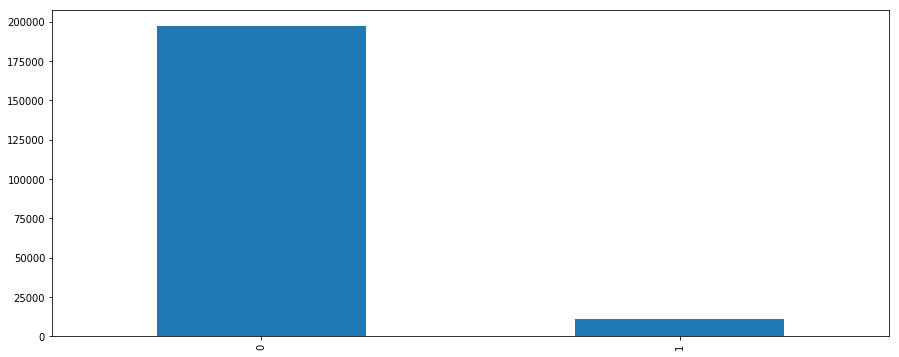

In [220]:
train_us.is_click.value_counts().plot.bar()

In [250]:
train_us['impression_time']=pd.to_datetime(0)

In [249]:
train[train.impression_id=='29f0b80e008bc42acf8cb46561055dc6']['impression_time'].iloc[0]

Timestamp('2018-11-23 12:27:00')

In [65]:
impression_time=[]

In [66]:
with tqdm(total=len(train_us)) as pbar:
    for index, row in train_us.iterrows():
        impression_id =row['impression_id']
        impression_time.append(train[train.impression_id==impression_id]['impression_time'].iloc[0])
        
        pbar.update(1)

100%|██████████| 208303/208303 [1:04:11<00:00, 54.08it/s]


In [67]:
train_us['impression_time']=impression_time

In [69]:
type(train_us.impression_time.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
log = pd.read_csv('data/view_log.csv')

In [24]:
log.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [26]:
log.server_time = pd.to_datetime(log.server_time)

In [16]:
ids = train_us.user_id.unique()

In [48]:
flag=[0]*len(log)

In [56]:
len(flag)

3118622

In [51]:
with tqdm(total=len(log)) as pbar:
    for index, row in log.iterrows():
        if row['user_id'] in ids:
            flag[index] = 1
        
        pbar.update(1)

100%|██████████| 3118622/3118622 [16:33<00:00, 3137.96it/s]


In [53]:
log['flag'] = flag

In [54]:
log_us = log[log.flag==1]

In [55]:
log_us

,server_time,device_type,session_id,user_id,item_id,flag
0,2018-10-15 08:58:00,android,112333,4557,32970,1
1,2018-10-15 08:58:00,android,503590,74788,7640,1
2,2018-10-15 08:58:00,android,573960,23628,128855,1
3,2018-10-15 08:58:00,android,121691,2430,12774,1
4,2018-10-15 08:58:00,android,218564,19227,28296,1
5,2018-10-15 08:58:00,android,635314,87387,86660,1
6,2018-10-15 08:58:00,android,482459,348,35370,1
7,2018-10-15 08:58:00,android,218564,19227,100065,1
8,2018-10-15 08:58:00,android,947548,30183,86558,1
9,2018-10-15 08:58:00,android,941129,31754,127900,1


In [122]:
train[train.user_id==71748]

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,visited
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,1.0
14,73278a4a86960eeb576a8fd4c9ec6997,2018-11-15 00:08:00,71748,259,intermediate,1,0,1.0
18776,0d977aeaaa2606697e263965053f6b3f,2018-11-19 20:01:00,71748,259,intermediate,1,0,1.0
49478,f3498e568e0bb45515779d6bd47e20f4,2018-11-19 20:07:00,71748,259,intermediate,1,0,1.0
82245,60e43a4b630d0225162fd9d70f8e6fed,2018-11-23 14:10:00,71748,259,intermediate,1,0,2.0
95017,8a3839705a0955fad739177a19f3c8bb,2018-11-29 12:50:00,71748,259,intermediate,0,0,2.0
99014,a656ff539a8a86ebb396e37242753fe9,2018-11-29 12:44:00,71748,259,intermediate,0,0,2.0
233696,86e34badcf80768f0ad5667554c8cec9,2018-12-12 09:01:00,71748,259,latest,1,0,2.0
235336,17ceee375eb5fb04817d6c9d673f40ff,2018-12-12 09:08:00,71748,259,latest,1,0,2.0


In [121]:
log[log.user_id==71748]

,server_time,device_type,session_id,user_id,item_id
399881,2018-10-23 12:59:00,android,658178,71748,122348
2076842,2018-11-23 12:00:00,android,415583,71748,32721


In [77]:
len(train.user_id.unique())

74723

In [76]:
len(log.user_id.unique())

89157

In [104]:
train['visited'] = np.nan

In [99]:
temp

Timestamp('2018-11-15 00:01:00')

In [98]:
log[(log.server_time<temp) & (log.user_id==63410)]

,server_time,device_type,session_id,user_id,item_id
284024,2018-10-21 06:13:00,android,356854,63410,43209
284028,2018-10-21 06:13:00,android,356854,63410,66370
309046,2018-10-21 17:01:00,android,345289,63410,43209
339224,2018-10-22 09:54:00,android,406658,63410,43209
449354,2018-10-24 11:14:00,android,15568,63410,71877
486317,2018-10-25 05:00:00,android,343558,63410,43209
486325,2018-10-25 05:03:00,android,343558,63410,43209


In [113]:
train.index[train.impression_id=='72b32a1f754ba1c09b3695e0cb6cde7f'].to_list()[0]

7

In [58]:
train_us['visited']=0

In [60]:
train_us.head()

,impression_id,user_id,app_code,is_4g,os_version_intermediate,os_version_latest,os_version_old,is_click,visited
0,c4ca4238a0b923820dcc509a6f75849b,87862,422,0,0,0,1,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,1,0,1,0,1,0
2,70efdf2ec9b086079795c442636b55fb,71748,259,1,1,0,0,0,0
3,8e296a067a37563370ded05f5a3bf3ec,69209,244,1,0,1,0,0,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,62873,473,0,0,1,0,0,0


In [76]:
impression_id_visited=[]

In [77]:
with tqdm(total=len(train_us.user_id.unique())) as pbar:
    for ids in train_us.user_id.unique():
        tmp = train_us[train_us.user_id==ids]
        for index, row in tmp.iterrows():
            time = row['impression_time']
            impression_id_visited.append((row['impression_id'],len(log_us[(log_us.server_time<time) & (log_us.user_id==ids)])))
            
        pbar.update(1)

100%|██████████| 70066/70066 [41:00<00:00, 28.48it/s]  


In [86]:
impression_id_visited[208275][0]

'29e728dfcad6013313d3639fc9b5094b'

In [89]:
train_us['visited']=0

In [98]:
with tqdm(total=len(impression_id_visited)) as pbar:
    for i in range(len(impression_id_visited)):
        train_us.loc[train_us.impression_id==impression_id_visited[i][0],'visited']=impression_id_visited[i][1]
        pbar.update(1)

100%|██████████| 208303/208303 [1:25:46<00:00, 40.47it/s]


In [99]:
train_us.to_csv('checkpoint1.csv')

In [4]:
train_us = pd.read_csv('checkpoint1.csv',index_col=0)

In [11]:
train_us.head()

,impression_id,user_id,app_code,is_4g,os_version_intermediate,os_version_latest,os_version_old,is_click,visited,impression_time
0,c4ca4238a0b923820dcc509a6f75849b,87862,422,0,0,0,1,0,1,2018-11-15 00:00:00
1,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,1,0,1,0,1,7,2018-11-15 00:01:00
2,70efdf2ec9b086079795c442636b55fb,71748,259,1,1,0,0,0,1,2018-11-15 00:02:00
3,8e296a067a37563370ded05f5a3bf3ec,69209,244,1,0,1,0,0,11,2018-11-15 00:02:00
4,182be0c5cdcd5072bb1864cdee4d3d6e,62873,473,0,0,1,0,0,9,2018-11-15 00:02:00


In [73]:
flag,count

(1, 95)

In [13]:
item = pd.read_csv('data/item_data.csv')

Find the last visited products before getting an impression:
for i:n:
        impression_time<server_time:
            item_id
            train_us<-item_details

In [14]:
item.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [33]:
train_us[train_us.user_id==71748]

,impression_id,user_id,app_code,is_4g,os_version_intermediate,os_version_latest,os_version_old,is_click,visited,impression_time
2,70efdf2ec9b086079795c442636b55fb,71748,259,1,1,0,0,0,1,2018-11-15 00:02:00
11,73278a4a86960eeb576a8fd4c9ec6997,71748,259,1,1,0,0,0,1,2018-11-15 00:08:00
43475,f3498e568e0bb45515779d6bd47e20f4,71748,259,1,1,0,0,0,1,2018-11-19 20:07:00
72245,60e43a4b630d0225162fd9d70f8e6fed,71748,259,1,1,0,0,0,2,2018-11-23 14:10:00
83431,8a3839705a0955fad739177a19f3c8bb,71748,259,0,1,0,0,0,2,2018-11-29 12:50:00
86933,a656ff539a8a86ebb396e37242753fe9,71748,259,0,1,0,0,0,2,2018-11-29 12:44:00
204885,86e34badcf80768f0ad5667554c8cec9,71748,259,1,0,1,0,0,2,2018-12-12 09:01:00
206319,17ceee375eb5fb04817d6c9d673f40ff,71748,259,1,0,1,0,0,2,2018-12-12 09:08:00


In [49]:
ids = train_us[train_us.impression_id=='17ceee375eb5fb04817d6c9d673f40ff']['user_id'].iloc[0]

In [51]:
time=train_us[train_us.impression_id=='17ceee375eb5fb04817d6c9d673f40ff']['impression_time'].iloc[0]
item_id = log[(log.server_time<time) & (log.user_id==ids)]
item_id

,server_time,device_type,session_id,user_id,item_id
399881,2018-10-23 12:59:00,android,658178,71748,122348
2076842,2018-11-23 12:00:00,android,415583,71748,32721


In [65]:
items=[]

In [66]:
with tqdm(total=len(train_us)) as pbar:
    for index, row in train_us.iterrows():
        time = row['impression_time']
        item_id = log[(log.server_time<time) & (log.user_id==row['user_id'])]
        
        if len(item_id)>0:
            items.append((row['impression_id'],item_id['item_id'].iloc[-1]))

        else:
            items.append(0)
            
        pbar.update(1)

100%|██████████| 208303/208303 [39:52<00:00, 87.08it/s] 


In [72]:
items[1][0]

'45c48cce2e2d7fbdea1afc51c7c6ad26'

In [69]:
train_us['item_id']=0

In [73]:
with tqdm(total=len(items)) as pbar:
    for i in range(len(items)):
        if items[i]!=0:
            train_us.loc[train_us.impression_id==items[i][0],'item_id']=items[i][1]
        pbar.update(1)

100%|██████████| 208303/208303 [55:00<00:00, 63.12it/s] 


In [75]:
train_us.to_csv('checkpoint2.csv',index=False)

In [89]:
tmp=[]

In [93]:
train_us['item_id'].isnull().sum()

0

In [95]:
with tqdm(total=len(train_us)) as pbar:
    for index, row in train_us.iterrows():
        item_id = row['item_id']
        
        if len(item[item.item_id==item_id]['item_price'])!=0:
            price = item[item.item_id==item_id]['item_price'].iloc[0]
            
        else:
            price=0
            
        if len(item[item.item_id==item_id]['product_type'])!=0:
            ptype = item[item.item_id==item_id]['product_type'].iloc[0]
        
        else:
            ptype=0
            
        tmp.append((row['impression_id'],price,ptype))
            
        pbar.update(1)

100%|██████████| 208303/208303 [17:26<00:00, 199.11it/s]


In [96]:
tmp[0][2]

5622

In [99]:
train_us['item_price']=0
train_us['ptype']=0

In [100]:
with tqdm(total=len(tmp)) as pbar:
    for i in range(len(tmp)):
        train_us.loc[train_us.impression_id==tmp[i][0],'item_price']=tmp[i][1]
        train_us.loc[train_us.impression_id==tmp[i][0],'ptype']=tmp[i][2]
        pbar.update(1)

100%|██████████| 212305/212305 [2:00:21<00:00, 29.40it/s]  


In [101]:
train_us.to_csv('checkpoint3.csv',index=False)

In [2]:
train_us = pd.read_csv('checkpoint3.csv')
train_us.head()

,impression_id,user_id,app_code,is_4g,os_version_intermediate,os_version_latest,os_version_old,is_click,visited,impression_time,item_id,item_price,ptype
0,c4ca4238a0b923820dcc509a6f75849b,87862,422,0,0,0,1,0,1,2018-11-15 00:00:00,43886,2350,5622
1,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,1,0,1,0,1,7,2018-11-15 00:01:00,43209,3421,577
2,70efdf2ec9b086079795c442636b55fb,71748,259,1,1,0,0,0,1,2018-11-15 00:02:00,122348,973,2874
3,8e296a067a37563370ded05f5a3bf3ec,69209,244,1,0,1,0,0,11,2018-11-15 00:02:00,104035,819,2944
4,182be0c5cdcd5072bb1864cdee4d3d6e,62873,473,0,0,1,0,0,9,2018-11-15 00:02:00,4069,4556,9215


In [102]:
train_us.head()

,impression_id,user_id,app_code,is_4g,os_version_intermediate,os_version_latest,os_version_old,is_click,visited,impression_time,item_id,item_price,ptype
0,c4ca4238a0b923820dcc509a6f75849b,87862,422,0,0,0,1,0,1,2018-11-15 00:00:00,43886,2350,5622
1,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,1,0,1,0,1,7,2018-11-15 00:01:00,43209,3421,577
2,70efdf2ec9b086079795c442636b55fb,71748,259,1,1,0,0,0,1,2018-11-15 00:02:00,122348,973,2874
3,8e296a067a37563370ded05f5a3bf3ec,69209,244,1,0,1,0,0,11,2018-11-15 00:02:00,104035,819,2944
4,182be0c5cdcd5072bb1864cdee4d3d6e,62873,473,0,0,1,0,0,9,2018-11-15 00:02:00,4069,4556,9215


In [12]:
draw_missing_data_table(train)

,Total,Percent
is_click,0,0.0
is_4G,0,0.0
os_version,0,0.0
app_code,0,0.0
user_id,0,0.0
impression_time,0,0.0
impression_id,0,0.0


In [13]:
draw_missing_data_table(item)

,Total,Percent
product_type,0,0.0
category_3,0,0.0
category_2,0,0.0
category_1,0,0.0
item_price,0,0.0
item_id,0,0.0


In [14]:
draw_missing_data_table(log)

,Total,Percent
item_id,0,0.0
user_id,0,0.0
session_id,0,0.0
device_type,0,0.0
server_time,0,0.0
